In [49]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

matplotlib.use('qt5agg')

In [29]:
# process info.log

res = []
single = {'model_type':'','data':[]}
with open("../logs/info.log",'r',encoding='utf8') as info:
    for line in info:
        if 'Num Epochs' in line:
            num_epochs = line.split('=')[-1].strip()
            print(num_epochs)
        if 'Model type' in line:
            model_type = line.split(' ')[-1].strip()
            print(model_type)
            if single['data']:
                res.append(single.copy())
                single = {'model_type':'','data':[]}
            single['model_type'] = model_type
        if 'eval_performance' in line:
            # [precision, recall, f1score, eval_loss]
            per = [x.split(':')[-1].strip() for x in line.split('\t')[-1].split('|')]
            # print(per)
            single['data'].append(per)
    res.append(single.copy())
    for r in res:
        print(r)

20
bert_base_chinese-crf
20
bert_base_chinese-lstm-crf
20
albert_chinese_large-crf
20
albert_chinese_large-lstm-crf
20
chinese_bert_wwm_ext-crf
20
chinese_bert_wwm_ext-lstm-crf
20
chinese_roberta_wwm_ext_large-crf
20
chinese_roberta_wwm_ext_large-lstm-crf
{'model_type': 'bert_base_chinese-crf', 'data': [['0.1461', '0.1228', '0.1335', '51.4625'], ['0.2452', '0.2449', '0.2450', '41.9250'], ['0.2656', '0.2848', '0.2749', '39.1383'], ['0.2695', '0.3118', '0.2891', '38.6454'], ['0.3351', '0.3428', '0.3389', '34.2459'], ['0.4207', '0.4018', '0.4110', '31.3937'], ['0.4566', '0.4316', '0.4438', '29.1947'], ['0.4481', '0.4874', '0.4670', '30.7084'], ['0.5038', '0.5389', '0.5207', '27.6878'], ['0.5517', '0.5596', '0.5556', '25.8584'], ['0.5728', '0.5746', '0.5737', '27.0313'], ['0.6086', '0.5895', '0.5989', '28.3653'], ['0.6049', '0.6308', '0.6176', '28.1723'], ['0.6186', '0.6479', '0.6329', '28.5265'], ['0.6137', '0.6527', '0.6326', '33.5142'], ['0.5854', '0.6692', '0.6245', '33.3081'], ['0.627

In [31]:
label_data = []
class Data:
    def __init__(self,label):
        self.label = label
        self.data = {
        "precision": [],
        "recall": [],
        "f1": [],
        "eval_loss":[]
        }

for r in res:
    data = Data(r['model_type'])
    for d in r['data']:
        data.data["precision"].append(d[0])
        data.data["recall"].append(d[1])
        data.data["f1"].append(d[2])
        data.data["eval_loss"].append(d[3])
    label_data.append(data)
print(label_data[0].data)

{'precision': ['0.1461', '0.2452', '0.2656', '0.2695', '0.3351', '0.4207', '0.4566', '0.4481', '0.5038', '0.5517', '0.5728', '0.6086', '0.6049', '0.6186', '0.6137', '0.5854', '0.6272', '0.6546', '0.6722', '0.7110'], 'recall': ['0.1228', '0.2449', '0.2848', '0.3118', '0.3428', '0.4018', '0.4316', '0.4874', '0.5389', '0.5596', '0.5746', '0.5895', '0.6308', '0.6479', '0.6527', '0.6692', '0.6819', '0.6974', '0.6889', '0.6886'], 'f1': ['0.1335', '0.2450', '0.2749', '0.2891', '0.3389', '0.4110', '0.4438', '0.4670', '0.5207', '0.5556', '0.5737', '0.5989', '0.6176', '0.6329', '0.6326', '0.6245', '0.6534', '0.6753', '0.6804', '0.6996'], 'eval_loss': ['51.4625', '41.9250', '39.1383', '38.6454', '34.2459', '31.3937', '29.1947', '30.7084', '27.6878', '25.8584', '27.0313', '28.3653', '28.1723', '28.5265', '33.5142', '33.3081', '30.7389', '32.5123', '28.7459', '30.5150']}


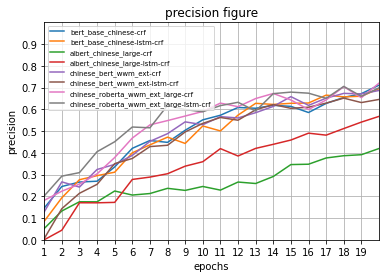

In [68]:
# plot precision
def plot_data(metric):

    for d in label_data:
        x = np.arange(1, len(d.data[metric]) + 1, 1)
        y = np.array(d.data[metric], dtype=float)
        plt.plot(x, y, label=d.label)
    plt.legend(fontsize="x-small")
    plt.grid()

    my_x_ticks = np.arange(1, 20, 1)
    my_y_ticks = np.arange(0, 1, 0.1)
    plt.xticks(my_x_ticks)
    plt.yticks(my_y_ticks)

    plt.xlim(1, 20)
    plt.ylim(0, 1)

    plt.xlabel('epochs')
    plt.ylabel(metric)
    plt.title(metric+" figure")

    plt.savefig(f"{metric}.png")
    plt.show()

plot_data('precision')
